In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import zero_one_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
n_estimators = 200

In [13]:
X, y = datasets.make_hastie_10_2(n_samples=12000, random_state=1)
train_x, train_y = X[2000:],y[2000:] #after 2000 as train
test_x, test_y = X[:2000], y[:2000] #before 2000 as test

In [22]:
dt_stump = DecisionTreeClassifier(max_depth =1, min_samples_leaf=1)
dt_stump.fit(train_x,train_y)
dt_stump_err = 1.0 - dt_stump.score(test_x, test_y)
print(dt_stump_err)

0.45199999999999996


In [24]:
dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)
dt_err = 1.0 - dt.score(test_x, test_y)
print(dt_err)

0.20550000000000002


In [26]:
ada = AdaBoostClassifier(base_estimator = dt_stump, n_estimators = n_estimators)
ada.fit(train_x, train_y)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

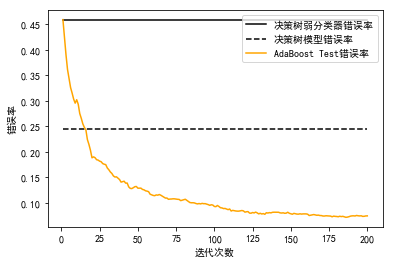

In [50]:
fig = plt.figure()
plt.rcParams['font.sans-serif'] = ['SimHei'] #show Chinese character correctly
ax = fig.add_subplot(111)
ax.plot([1, n_estimators],[dt_stump_err]*2, 'k-', label=u'决策树弱分类器错误率')
ax.plot([1, n_estimators],[dt_err]*2, 'k--', label=u'决策树模型错误率')
ada_err = np.zeros((n_estimators,))

for i, pred_y in enumerate(ada.staged_predict(test_x)):
    ada_err[i] = zero_one_loss(pred_y, test_y)

ax.plot(np.arange(n_estimators)+1, ada_err, label='AdaBoost Test错误率',color='orange')
ax.set_xlabel('迭代次数')
ax.set_ylabel('错误率')
leg = ax.legend(loc='upper right', fancybox=True)

plt.show()